In [1]:
import numpy as np
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

In [2]:
xd = {}
yd = {}
xd['prec'] = [0,1,2,3,4,5,6]
yd['prec'] = [
    0.729,
    0.5573333333,
    0.3196666667,
    0.1313333333,
    0.05366666667,
    0.02033333333,
    0.005333333333]
xd['memory'] = [0,1,2,3,4,5,6,7]
yd['memory'] = [
    2.204333333,
    2.427,
    2.426666667,
    2.434333333,
    2.436,
    2.502666667,
    2.535666667,
    2.617333333,]
yd['memory_preload'] = [
    0,
    2.620333333,
    2.994666667,
    4.912,
    9.056666667,
    16.73833333,
    24,
    20,]
xd['inference'] = [0,1,2,3,4,5,6,7]
yd['inference'] = [
    0.422,
    0.4723333333,
    0.4736666667,
    0.4763333333,
    0.4803333333,
    0.492,
    0.5246666667,
    0.571,]

['2', '3', '4', '5', '6']
['2', '4', '8', '16', '32']


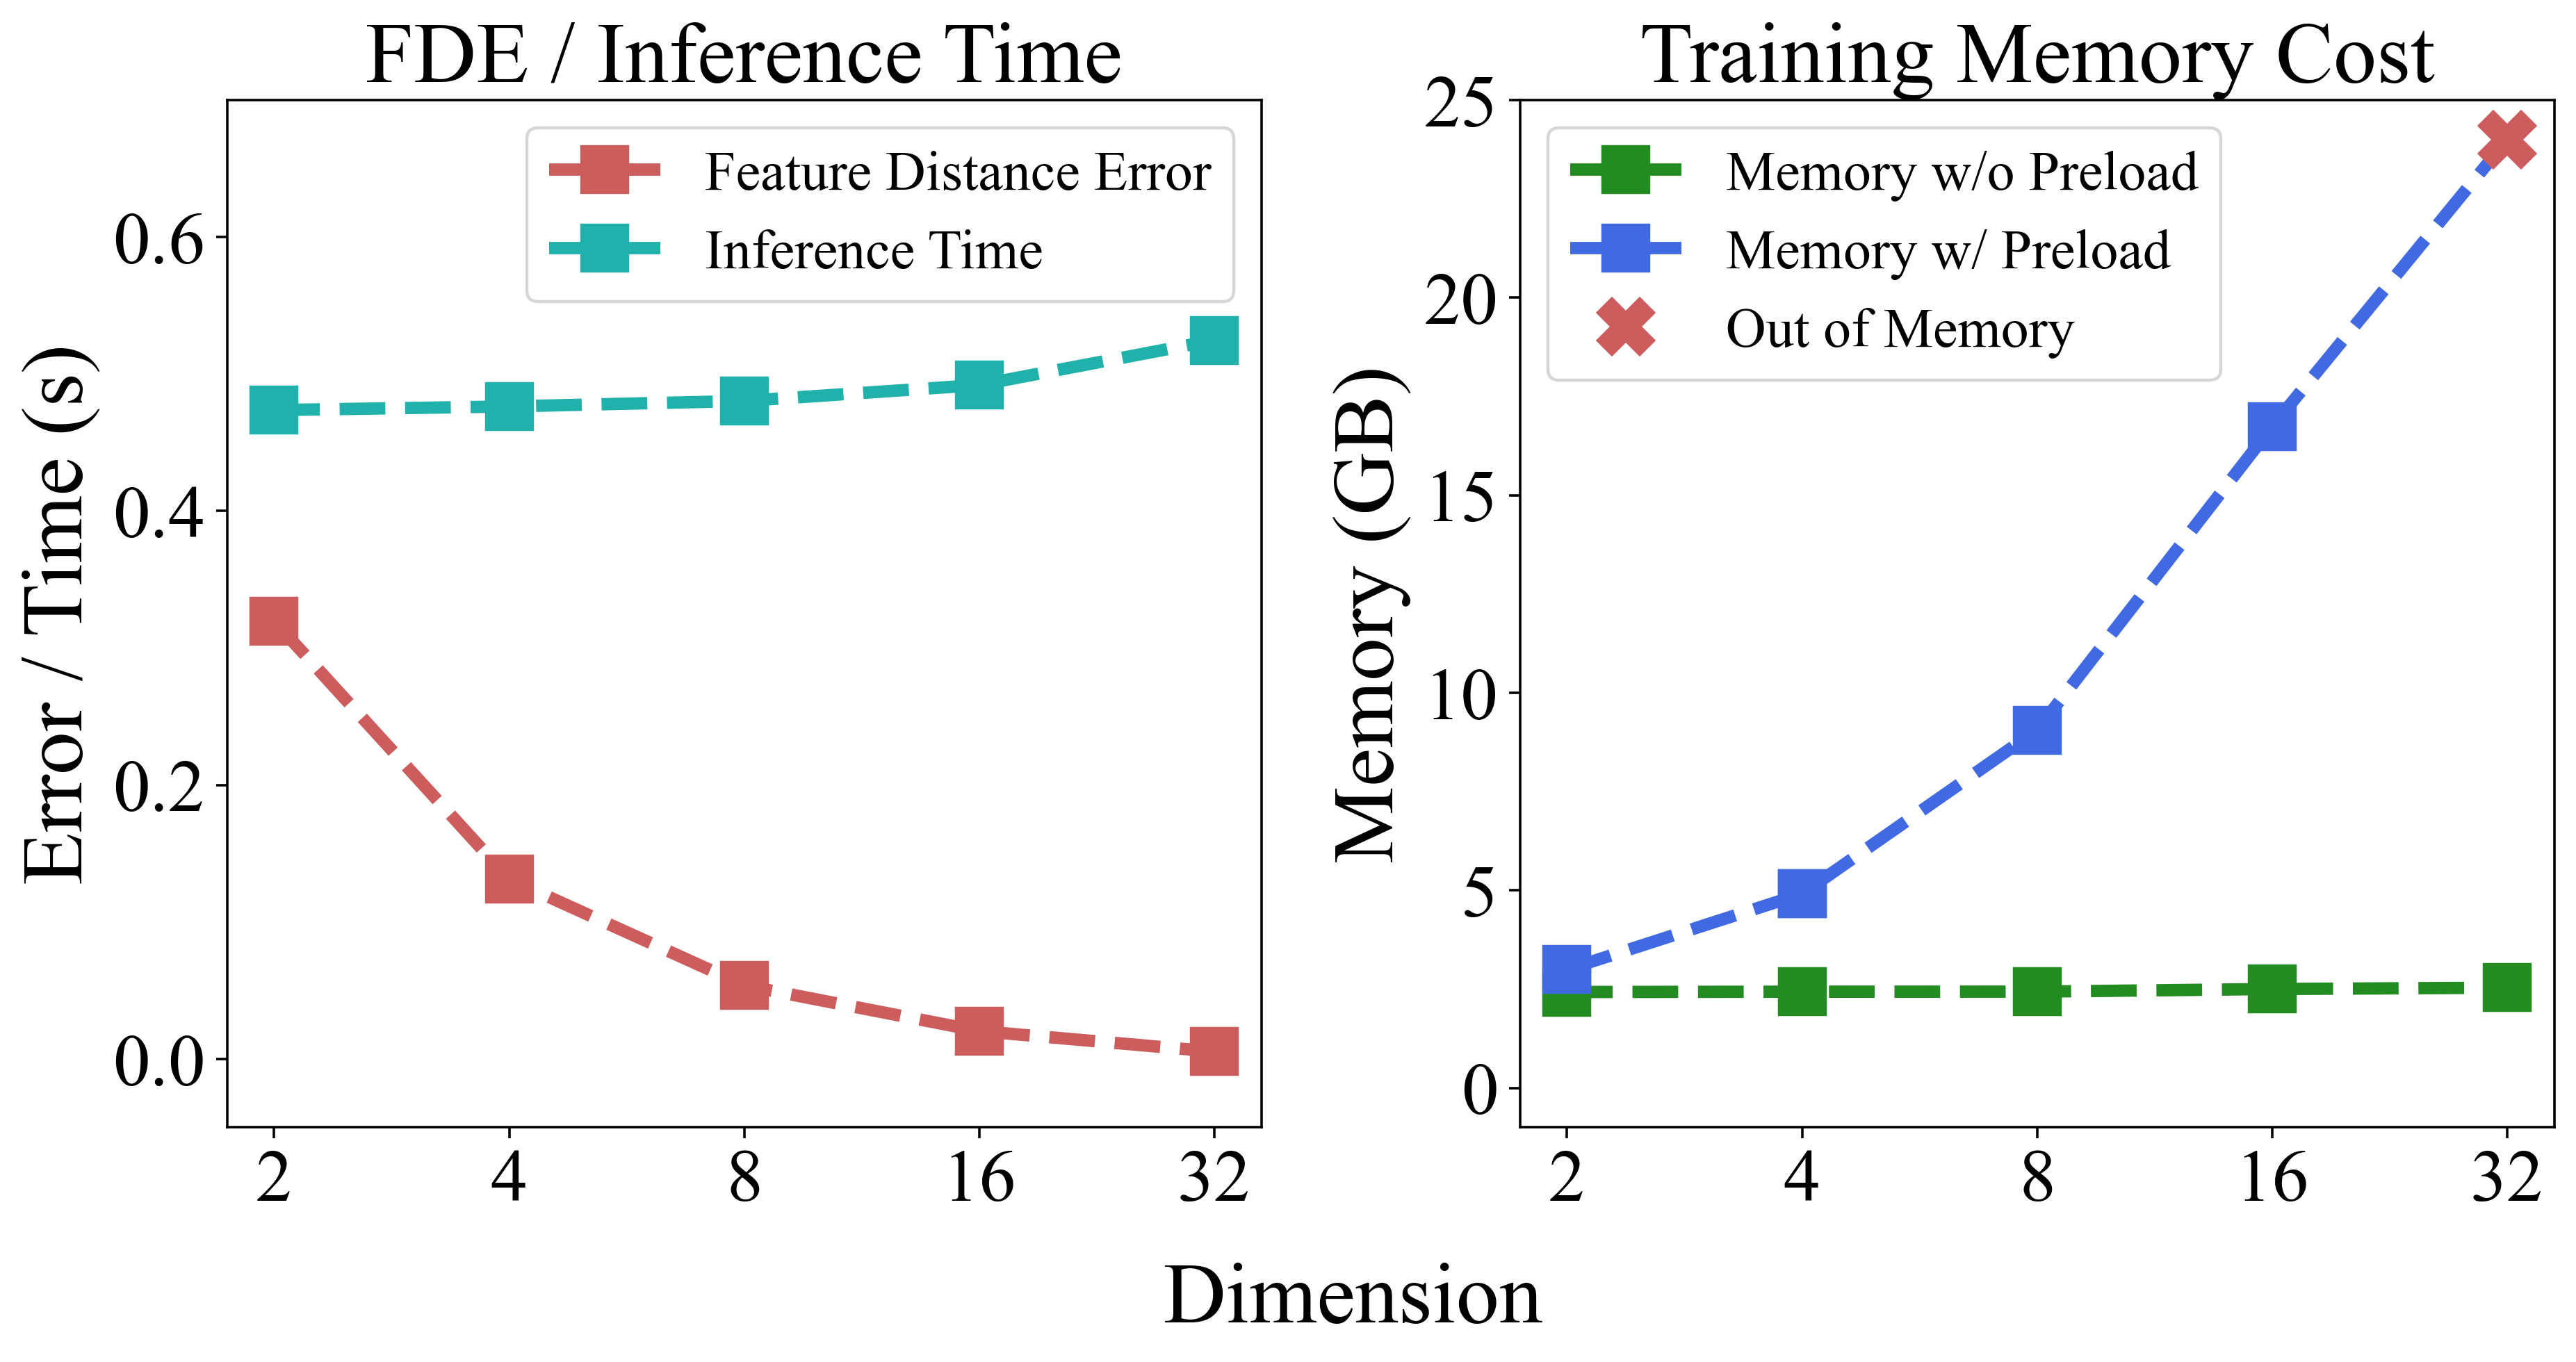

In [3]:
# Distance
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=320, sharex=True)
fig.set_size_inches(13.5, 6)

x = np.array(xd['prec'])[2:7]
y = np.array(yd['prec'])[2:7]

x2 = np.array(xd['inference'])[2:7]
y2 = np.array(yd['inference'])[2:7]

ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.tick_params(axis='both', which='minor', labelsize=24)
ax1.set_ylim([-0.05, 0.7])
ax1.plot(x, y, "s--", color="indianred", linewidth=4, markersize=15, label="Feature Distance Error")
ax1.plot(x2, y2, "s--", color="lightseagreen", linewidth=4, markersize=15, label="Inference Time")
ax1.xaxis.set_ticks(x)

labels = [item.get_text() for item in ax1.get_xticklabels()]
print(labels)
ax1.set_ylabel('Error / Time (s)', fontsize=28)
ax1.set_xticklabels(list(2**(x-1)))
ax1.set_title("FDE / Inference Time", fontsize=28)
ax1.legend(fontsize=18)

# # Inference Time
# x = np.array(xd['inference'])[2:7]
# y = np.array(yd['inference'])[2:7]

# ax3.tick_params(axis='both', which='major', labelsize=15)
# ax3.set_ylim([0, 0.6])
# ax3.plot(x, y, "s--", color="mediumaquamarine", linewidth=2, markersize=9, label="Inference Time")
# ax3.xaxis.set_ticks(x)

# labels = [item.get_text() for item in ax3.get_xticklabels()]
# print(labels)
# ax3.set_xlabel('Dimension', fontsize=15)
# ax3.set_ylabel('Time (s)', fontsize=15)
# ax3.set_xticklabels(list(2**(x-1)))
# ax3.set_title("Inference Time", fontsize=16)

# # Memory
x = np.array(xd['memory'])[2:7]
y = np.array(yd['memory'])[2:7]
y_preload = np.array(yd['memory_preload'])[2:7]

ax2.tick_params(axis='both', which='major', labelsize=24)
ax2.set_ylim([-1, 25])
ax2.plot(x, y, "s--", color="forestgreen", linewidth=4, markersize=15, label="Memory w/o Preload")
ax2.plot(x, y_preload, "--", color="royalblue", linewidth=4, markersize=15)
for i in range(4):
    ax2.plot(x[i], y_preload[i], "s--", color="royalblue", linewidth=4, markersize=15)
    
ax2.plot(x[1], y_preload[1], "s--", color="royalblue", linewidth=4, markersize=15, label="Memory w/ Preload")
ax2.plot(x[4], y_preload[4], "X", color="indianred", linewidth=4, markersize=18, label="Out of Memory")
ax2.xaxis.set_ticks(x)

ax2.legend(fontsize=18)
labels = [item.get_text() for item in ax2.get_xticklabels()]
print(labels)
ax2.set_ylabel('Memory (GB)', fontsize=28)
ax2.set_xticklabels(list(2**(x-1)))
ax2.set_title("Training Memory Cost", fontsize=28)

fig.text(0.5,-0.02, 'Dimension', fontsize=28, ha="center", va="center")

plt.subplots_adjust(wspace=0.25)
plt.savefig('ablation_feature.pdf', bbox_inches='tight')  